   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

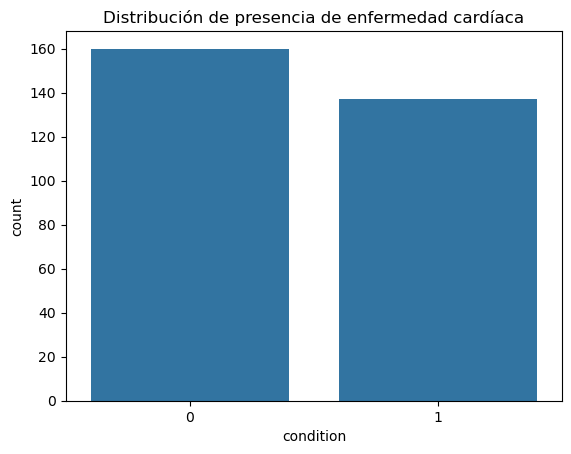

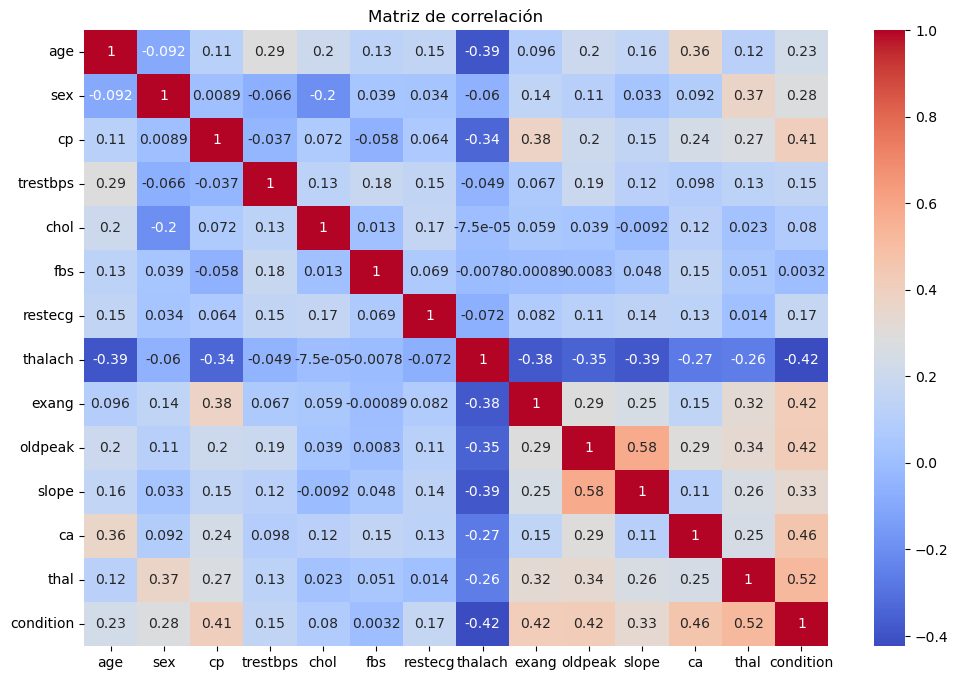

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('heart_cleveland_upload.csv')

# Primer vistazo
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum()) 

# Visualizar la distribución de la variable objetivo
sns.countplot(data=df, x='condition') 
plt.title("Distribución de presencia de enfermedad cardíaca")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [4]:
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)


In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('condition', axis=1)  
y = df['condition']              

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(scores.sort_values(by='Score', ascending=False))


     Feature       Score
12      thal  109.629171
11        ca   80.577866
9    oldpeak   64.677208
7    thalach   64.589855
8      exang   63.680253
2         cp   59.241915
10     slope   36.804300
1        sex   24.798347
0        age   16.038097
6    restecg    8.394987
3   trestbps    7.117646
4       chol    1.913800
5        fbs    0.002959


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\FELIPE LANCHEROS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7333333333333333
Confusion Matrix:
 [[23  9]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



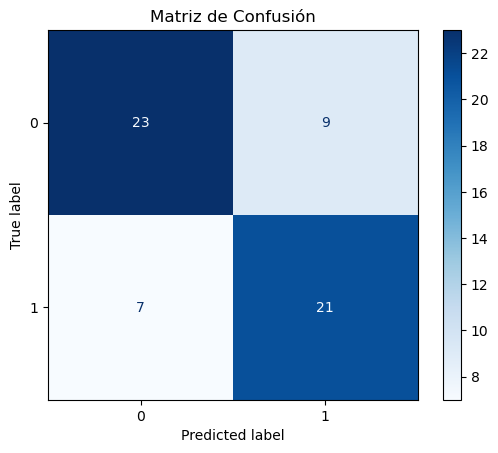

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


In [1]:
## Resultados El modelo de Regresión Logística obtuvo un accuracy de XX%.
## Las variables más influyentes fueron: edad, colesterol, presión, etc.
## La matriz de confusión muestra buena clasificación entre pacientes con/sin enfermedad.